1. Unsatisfactory Performance of Logistic Regression: Suppose you are implementing a
simple logistic regression to solve a binary classification problem but you find unsatisfactory
results.
(a) What actions on your dataset would you consider to take in order to improve the
performance of the model?
(b) What would you consider to try for the existing algorithm to improve the performance
of the model? Hint: Think about hyperparameters.
(c) What other algorithms would you consider to try in this case? Why? Explain

(a) First I will check the data set is balanced or unbalanced as it is the classification problem. If the dataset is unbalanced I will try to balance the data set and ensures both classes are evenly distributed in training and testing data set.Again it depends on the data set, if it requires minority class like cancer diagnosis then we should not balance the data set.

Secondly I will check the all the features of the data set are independent of each other, if features are highly dependent then I try to get the potential features for better performance.

(b) I will check first the model has high bias or high varience. If it has high varience I will try to reduce the varience by imposing regularizations(l1,l2,elasticnet) using C and also by reducing the max_iter value i.e by reducing the number to iterations to reduce the varience. 

If it is showing high bias then I will try to find the bias varience trade off value through grid search to get the hyperparameters to get the best performance of the model.

(c)As we know that liblinear is the default in scikit learn, which can handle large data sets and also l1 and l2 norms. I will consider LBFGS, SAG, and SAGA as other algorithms to cross vaidate each other to pick the better one.
If the data set is very small I will be using LBFGS i.e Limited-memory Broyden-Fletcher-Goldfarb-Shanno.
If the data is large then I will use SAG stochastic Average Gradient Descent, which can handle l2 norm. 
If it requires l1 norm then I will use SAGA variance-reduced stochastic gradient algorithm which is better than other SAG models

2. Hybrid Naive Bayes: In lecture 6, we introduced two types of naive Bayes classifiers,
namely the classical naive Bayes classifier and the Gaussian naive Bayes classifier. As we saw,
the former is applied when the features are categorical, whereas the latter is applied when
features are continuous. With a simple modification, we can build a naive Bayes classifier
when both categorical and continuous features are present. We refer to this classifier as the
hybrid naive Bayes classifier. Suppose in a classification problem with K classes, we have d1
categorical features, denoted by Z = (z1, z2, · · · , zd1
), and d2 continuous features, denoted by
~x ∈ R
d2
. As in classical and Gaussian naive Bayes classifiers, the hybrid naive Bayes classifier
assumes independence among features. This allows us to take the advantage of formula (8)
in lecture 6, and predict the class of the target in the hybrid case by a similar formula
yˆ = argmax
i∈{1,2··· ,K}

p(Z = Z
∗
|y = i) p(~x = ~x∗
|y = i) p(y = i)

.
In other words, in order to predict the class of the target variable, we can calculate the
likelihoods of the categorical and continuous features separately, and multiply them due to
their independence. That is the only change we need to impose for the hybrid naive Bayes
classifier to work. A library, called Mixed Naive Bayes, has been written to implement naive
Bayes classification to hybrid datasets. Visit the Github repository https://github.com/
remykarem/mixed-naive-bayes to see how the mixed naive Bayes is implemented.

(a)Build a mixed naive Bayes classifier for the Heart Disease Dataset used in lecture 6. In
this implementation, consider all 13 features (Recall that in this dataset, 8 features are
categorical and 5 features are continuous)


In [4]:
!pip install mixed-naive-bayes

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [6]:
heart_df = pd.read_csv('heart.csv')     # Reading the csv source file as a dataframe
heart_df1=pd.read_csv('heart.csv')
heart_df.shape

(1025, 14)

In [7]:
# print the sample 5 values 
heart_df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
750,55,1,1,130,262,0,1,155,0,0.0,2,0,2,1
525,51,0,2,130,256,0,0,149,0,0.5,2,0,2,1
562,42,0,2,120,209,0,1,173,0,0.0,1,0,2,1
1003,52,1,0,108,233,1,1,147,0,0.1,2,3,3,1
782,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1


In [8]:
# Breaking features to continuous and categorical ones
cat_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
cont_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_df=heart_df[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal','age', 'trestbps', 'chol', 'thalach', 'oldpeak','target']]

In [9]:
# converting continuoues features to floating values
heart_df.iloc[:,8:-1] = heart_df.iloc[:,8:-1] / 1.0
heart_df.sample(5)

,sex,cp,fbs,restecg,exang,slope,ca,thal,age,trestbps,chol,thalach,oldpeak,target
487,1,0,0,0,0,1,1,3,65.0,135.0,254.0,127.0,2.8,0
758,0,1,0,1,0,2,0,2,46.0,105.0,204.0,172.0,0.0,1
694,1,0,0,1,0,1,0,3,39.0,118.0,219.0,140.0,1.2,0
1014,0,2,0,1,0,1,0,2,44.0,108.0,141.0,175.0,0.6,1
206,1,2,1,1,0,1,1,1,59.0,126.0,218.0,134.0,2.2,0


In [10]:
# Label encoding every categorical feature
label_encoder = LabelEncoder()
heart_df.iloc[:,0]=label_encoder.fit_transform(heart_df.iloc[:,0])
heart_df.iloc[:,1]=label_encoder.fit_transform(heart_df.iloc[:,1])
heart_df.iloc[:,2]=label_encoder.fit_transform(heart_df.iloc[:,2])
heart_df.iloc[:,3]=label_encoder.fit_transform(heart_df.iloc[:,3])
heart_df.iloc[:,4]=label_encoder.fit_transform(heart_df.iloc[:,4])
heart_df.iloc[:,5]=label_encoder.fit_transform(heart_df.iloc[:,5])
heart_df.iloc[:,6]=label_encoder.fit_transform(heart_df.iloc[:,6])
heart_df.iloc[:,7]=label_encoder.fit_transform(heart_df.iloc[:,7])
heart_df.sample(6)

,sex,cp,fbs,restecg,exang,slope,ca,thal,age,trestbps,chol,thalach,oldpeak,target
400,1,2,0,1,0,1,3,3,49.0,120.0,188.0,139.0,2.0,0
649,0,1,0,0,0,1,0,2,45.0,130.0,234.0,175.0,0.6,1
961,0,0,0,0,0,1,0,2,58.0,100.0,248.0,122.0,1.0,1
368,1,2,0,0,1,1,0,3,58.0,105.0,240.0,154.0,0.6,1
914,1,0,0,0,1,2,1,2,66.0,112.0,212.0,132.0,0.1,0
301,1,2,0,1,1,2,1,3,51.0,94.0,227.0,154.0,0.0,1


In [11]:
# # Defining the continuous features, categorical features and the target of the model
X = heart_df[cat_features+cont_features].values     # Features
y = heart_df['target'].values          # Target 
print(y.shape)

(1025,)


In [12]:
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [13]:
from mixed_naive_bayes import MixedNB
clf = MixedNB(categorical_features=[0,1,2,3,4,5,6,7])
clf.fit(X_train,y_train)

MixedNB(alpha=0.5, var_smoothing=1e-09)

In [14]:
train_y_pred = clf.predict(X_train)
test_y_pred = clf.predict(X_test)

In [15]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('mixed naive bias Train Classification Report: \n\n', train_report,'\n\n')
print('mixed naive bias Test Classification Report: \n\n', test_report)

mixed naive bias Train Classification Report: 

               precision    recall  f1-score   support

           0       0.86      0.83      0.85       393
           1       0.85      0.88      0.86       427

    accuracy                           0.86       820
   macro avg       0.86      0.86      0.86       820
weighted avg       0.86      0.86      0.86       820
 


mixed naive bias Test Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.81      0.85       106
           1       0.81      0.89      0.85        99

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



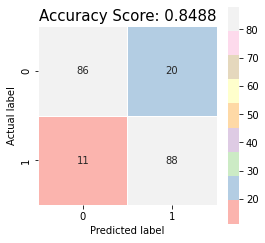

In [16]:
# Computing mixed naive bias confusion matrix

lda_c_matrix = confusion_matrix(y_test, test_y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(lda_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

---------------------------------------------------------------2(b)----------------------------------------------------------


(b) How do you evaluate the performance of the mixed naive Bayes classifier in part (a)? How do you compare the performance of the mixed naive Bayes classifier with the classical and Gaussian naive Bayes classifiers constructed in lecture 6?

The mixed naive bias classifer should good perfromace for the Heart Disease Data set. It shows accuracy of 85 for both test and train data sets. The f1 score is also 85 for both test and train data sets. The precision of finding 0 is 89 for test and finding 1 is 81 percent. Overall the mixed naice bias classifer performs well.

In [17]:
# Getting the naive bais model 
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import pandas as pd


# Defining the categorical features and the target of the model
X = heart_df1[cat_features].values     # Features
y = heart_df1['target'].values          # Target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

# Create a Multinomial naive Bayes model and fit it to the training data
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# Predict the class labels for the testing set and training using the trained model
train_y_pred = mnb.predict(X_train)
test_y_pred = mnb.predict(X_test)




In [18]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print(' Gaussian naive bias Train Classification Report: \n\n', train_report,'\n\n')
print(' Gaussian naive bias Test Classification Report: \n\n', test_report)

 Gaussian naive bias Train Classification Report: 

               precision    recall  f1-score   support

           0       0.82      0.78      0.80       349
           1       0.80      0.84      0.82       368

    accuracy                           0.81       717
   macro avg       0.81      0.81      0.81       717
weighted avg       0.81      0.81      0.81       717
 


 Gaussian naive bias Test Classification Report: 

               precision    recall  f1-score   support

           0       0.87      0.74      0.80       150
           1       0.78      0.89      0.83       158

    accuracy                           0.82       308
   macro avg       0.83      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308



In [19]:
# Defining the continuous features and the target of the model

from sklearn.naive_bayes import GaussianNB


# Defining the continuous features and the target of the model
X = heart_df1[cont_features].values     # Features
y = heart_df1['target'].values          # Target 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

gnb_clf = GaussianNB()              # Instantiating the gaussian naive Bayes classifier
gnb_clf.fit(X_train, y_train)       # Fitting the training data

GaussianNB()

In [20]:
# Predict the class labels for the testing set and training using the trained model
train_y_pred = gnb_clf.predict(X_train)
test_y_pred = gnb_clf.predict(X_test)

In [21]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print(' naive bias Train Classification Report: \n\n', train_report,'\n\n')
print(' naive bias Test Classification Report: \n\n', test_report)

 naive bias Train Classification Report: 

               precision    recall  f1-score   support

           0       0.75      0.66      0.70       349
           1       0.71      0.79      0.75       368

    accuracy                           0.73       717
   macro avg       0.73      0.72      0.72       717
weighted avg       0.73      0.73      0.72       717
 


 naive bias Test Classification Report: 

               precision    recall  f1-score   support

           0       0.74      0.62      0.67       150
           1       0.69      0.79      0.74       158

    accuracy                           0.71       308
   macro avg       0.71      0.71      0.70       308
weighted avg       0.71      0.71      0.71       308



After analysing the performace of mixed naive bias classifer and the native bias classifier for categorical features and the Gaussian naive bias for continuous features, mixed naive bias classifies better than individual biases.Its accuray and F1 score is higher than the native and Gaussian bias classifiers.

Native bias classifier gives the accuracy upto 81 percent for both test and train datasets, where as Gaussian naive bias shows just 70 percent accuracy. The F1 score of mixed naive bias classifier is 85, but the F1 scores of Classical and Gaussian naive bias classifiers are 80 and 70 percent respectively.

---------------------------------------------------------2(c)---------------------------------------------------------------

(c) Is there a straightforward generalization of LDA/QDA classification algorithms to hybrid datasets? Why? Explain.

I don't think there will be straight forword generalization of LDA/QDA classification algotithms to hybrid datasets, because LDA/BDA assumes and avoids the assumption of Gaussian naive bias classifier i.e features are independent of each other. In LDA the covarience matrix is diagonal and in QDA each feature has its own covarience matrix.Because of this reason I assume that there will be no straigt forward generalization of LDA and QDA to hybrid data sets.

Another reason is that LDA and QDA assumes that features are continuous. So, straight generalization is not possible.


In [22]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


# 3. LDA vs. QDA: In this problem, you will compare the performances of the LDA and QDA
classifiers on a given dataset. The goal is to find out what classifier (between LDA and QDA)
is most appropriate to be applied in different cases. In this problem proceed as follows.

(a) Download LDA-QDA-Toy-Data.csv and read the csv file into a dataframe. Regard x1 and
x2 columns as continuous features, and the y column as a binary categorical target. Split
the data into train and test with test size=0.25.

In [23]:
# Importing basic libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Loading the dataset

toy_df = pd.read_csv('LDA-QDA-Toy-Data.csv')     # Reading the csv source file as a dataframe
toy_df = toy_df.drop('Unnamed: 0', axis=1)       # Removing the un named column

# Finding the size of each class
print(toy_df.columns)
print('Size of class 0:', len(toy_df[toy_df['$y$']==0]))
print('Size of class 1:', len(toy_df[toy_df['$y$']==1]))
print('Shape of the dataset:', toy_df.shape)

X = toy_df[['$x_1$','$x_2$']].values     # Features
y = toy_df['$y$'].values   

# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)


Index(['$x_1$', '$x_2$', '$y$'], dtype='object')
Size of class 0: 1565
Size of class 1: 1435
Shape of the dataset: (3000, 3)


(b) Train LDA and QDA classifiers on the train subset established in part (a). Find the predictions of both classifiers for the test subset.

In [24]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()     # Instantiating the lda classifier
lda_clf.fit(X_train, y_train)              # Fitting the train data

qda_clf = QuadraticDiscriminantAnalysis()      # Instantiating the QDA classifier
qda_clf.fit(X_train, y_train)                  # Fitting the training data

# Finding the predictions of the lda classifier for train and test subsets 

lda_train_y_pred = lda_clf.predict(X_train)
lda_test_y_pred = lda_clf.predict(X_test)
qda_train_y_pred=qda_clf.predict(X_train)
qda_test_y_pred=qda_clf.predict(X_test)
print(lda_test_y_pred[:10])
print(qda_test_y_pred[:10])


[0 1 0 1 0 0 0 1 0 0]
[1 1 0 1 0 1 0 1 0 1]


(c) Calculate the relevant accuracy metrics by presenting the classification report for both train and test subsets. Assess the two classifiers and contrast their performances.

In [25]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(y_train, lda_train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, lda_test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, lda_train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, lda_test_y_pred)      # Generate classification report for test data

print('LDA Train Classification Report: \n\n', train_report,'\n\n')
print('LDA Test Classification Report: \n\n', test_report)

LDA Train Classification Report: 

               precision    recall  f1-score   support

           0       0.53      0.76      0.63      1166
           1       0.52      0.28      0.36      1084

    accuracy                           0.53      2250
   macro avg       0.53      0.52      0.50      2250
weighted avg       0.53      0.53      0.50      2250
 


LDA Test Classification Report: 

               precision    recall  f1-score   support

           0       0.56      0.76      0.64       399
           1       0.54      0.32      0.40       351

    accuracy                           0.55       750
   macro avg       0.55      0.54      0.52       750
weighted avg       0.55      0.55      0.53       750



In [26]:
# QDA classification report
train_score = metrics.accuracy_score(y_train, qda_train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, qda_test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, qda_train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, qda_test_y_pred)      # Generate classification report for test data

print('QDA Train Classification Report: \n\n', train_report,'\n\n')
print('QDA Test Classification Report: \n\n', test_report)

QDA Train Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.97      0.93      1166
           1       0.97      0.88      0.92      1084

    accuracy                           0.93      2250
   macro avg       0.93      0.92      0.92      2250
weighted avg       0.93      0.93      0.93      2250
 


QDA Test Classification Report: 

               precision    recall  f1-score   support

           0       0.92      0.98      0.95       399
           1       0.98      0.91      0.94       351

    accuracy                           0.95       750
   macro avg       0.95      0.95      0.95       750
weighted avg       0.95      0.95      0.95       750



After clearly observing the reports we can say that QDA is far more better performing than the LDA. LDA completely failed classifyng the data set by giving accuracy like monkey classifier. QDA gives accuary of 93 for training set and 95 for test data. LDA gives 53 for train and 55 for test data. Comparing F1 scores we can see that QDA has above 90 percent for both test and train data, where as LDA has less F1 scores.

(d) Use plot decision regions from the plotting module of the mlxtend library to plot the decision regions for the two classifiers in the two dimensional feature space formed by x1 and x2 (revisit the “Binary Example” of lecture 4 to see how decision regions are plotted)

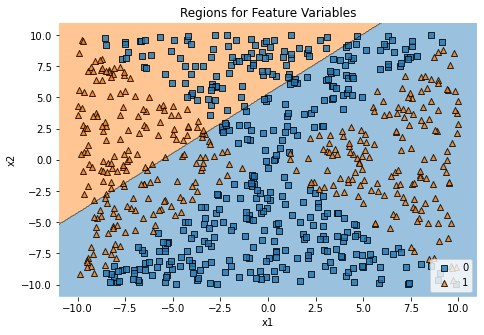

In [27]:
# Plotting the lda decision regions
import mlxtend
from mlxtend.plotting import plot_decision_regions

mlxtend.plotting.plot_decision_regions(X=X_test, y=y_test, clf=lda_clf) # Plotting the decision region

plt.title('Regions for Feature Variables')
plt.xlabel('x1')
plt.ylabel('x2') 
plt.legend(loc='lower right')
plt.tight_layout()
plt.gcf().set_size_inches(7, 5)
plt.show()

## 0: No Rain
## 1: Rain

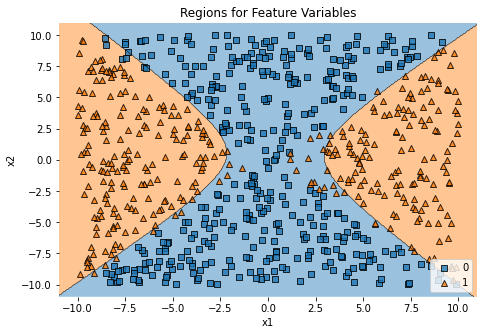

In [28]:
# Plotting the qda decision regions
import mlxtend
from mlxtend.plotting import plot_decision_regions

mlxtend.plotting.plot_decision_regions(X=X_test, y=y_test, clf=qda_clf) # Plotting the decision region

plt.title('Regions for Feature Variables')
plt.xlabel('x1')
plt.ylabel('x2') 
plt.legend(loc='lower right')
plt.tight_layout()
plt.gcf().set_size_inches(7, 5)
plt.show()

## 0: 
## 1: 

(e) Based on your findings in parts (c) and (d) and your literature search, explain in what situations it would be more appropriate to use QDA classifier. In what situations is the LDA classifier the more appropriate choice of classifier?

In [29]:
import numpy as np

# X is the featuresmatrix and y is the target vector
# split the data into separate classes
X = toy_df[['$x_1$','$x_2$']].values

# compute the covariance matrix for each class
cov_class0 = np.cov(X.T)
print(cov_class0)


[[32.8580326   0.14236697]
 [ 0.14236697 33.28961931]]


The QDA classifier should be used when there is evidence to suggest that the covariance matrix is different for each class, or when the decision boundary is expected to be curved. For example here after plotting we can oberve that the decison boundary should be curved to efficiently classify. LDA is used when covarience is same for all features and each feature follows a normal distribution. In LDA classifer hyperplane is expected.



## 4. Random Forests vs. Gradient Boosting: Contrast and compare random forest and
## gradient boosting classifiers from the point of view of

(a) internal structures of the algorithms

Random forests and gradient boosting are both ensemble methods used for classification and regression tasks. Random forests are made up of decision trees where each tree is built independently from random sample of data and then combined. On the other hand, gradient boosting builds trees one at a time, where each new tree trying to correct the errors made by the previous trained trees.

(b) being prone to overfitting

Gradient Boosting is prone to overfitting as it builds trees one after other, correcting errors which lead to over fit the data. Random forest on other hand builds trees on different samples of data which helps to reduce the varience of model, which reduces overfitting.



(c) tuning hyperparameters

Gradient Boosting hyperparameters - number of trees, depth of trees, learning rate are the hyperparameters
Random Forests hyperparameters - number of trees, number of features selected at each node 


(d) execution time to train

Random forests are faster to train than gradient boosting as they build each tree independently.Gradient boosting builds trees one at a time, with each new tree trying to correct the errors made by the previous trees. This means that the training time for gradient boosting increases with the number of trees and the depth of each tree. However,XGBoost and LightGBM have made gradient boosting much faster and more efficient than before. Random forests are slow in real- world data sets.

# 5. Classification Analysis: For this problem, use the csv file GateArrivalDelay-Classification.csv.
In this problem, you will employ several different classification algorithms on the data published by FAA to predict whether a gate will be experiencing arrival delay at the ORD airport.
The target variable in this problem is the Class which is a binary categorical variable (y = 0
corresponds to no delay, whereas y = 1 corresponds to an average of 15 minutes or more delay
for a gate at ORD airport). Potential features are
• % On-TimeGateArrivals
• AverageBlockDelay
• AverageTaxiInDelay
• AverageAirborneDelay
• AverageAirportDepartureDelay
• AverageGateDepartureDelay

(a) Determine the nature of the classification problem. Is the current classification problem
closer to a balanced classification or an unbalanced classification problem?

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Loading the dataset

gad_df = pd.read_csv('GateArrivalDelay-Classification.csv')     # Reading the csv source file as a dataframe
gad_df = gad_df.drop('Unnamed: 0', axis=1)       # Removing the un named column
gad_df.head()

,Date_Time,% On-TimeGateArrivals,AverageBlockDelay,AverageTaxiInDelay,AverageAirborneDelay,AverageAirportDepartureDelay,AverageGateDepartureDelay,Delay_Class
0,2019-03-01 00:00:00,90.00,7.70,9.47,0.60,13.67,6.67,0
1,2019-03-02 00:00:00,72.73,0.91,2.55,0.00,13.17,5.33,0
2,2019-03-03 00:00:00,75.00,1.00,0.91,0.00,25.50,14.00,0
3,2019-03-04 00:00:00,83.33,1.50,1.13,3.00,26.75,17.50,0
4,2019-03-05 00:00:00,90.91,0.64,1.38,1.27,15.00,12.50,0


In [31]:
# To check it is balanced or unbalanced 
#gad_df[]
print(gad_df.columns)
print('Size of class 0:', len(gad_df[gad_df['Delay_Class']==0]))
print('Size of class 1:', len(gad_df[gad_df['Delay_Class']==1]))
print('Shape of the dataset:', gad_df.shape)


Index(['Date_Time', '% On-TimeGateArrivals', 'AverageBlockDelay',
       'AverageTaxiInDelay', 'AverageAirborneDelay',
       'AverageAirportDepartureDelay', 'AverageGateDepartureDelay',
       'Delay_Class'],
      dtype='object')
Size of class 0: 1930
Size of class 1: 277
Shape of the dataset: (2207, 8)


Clearly we can see the difference between the number of instances target classes. It is the unbalanced classification problem.

(b) Construct a random forest classifier for the target Class in the presence of all 6 features. Calculate the relative feature importance from the constructed forest and identify the two most significant features.

In [32]:
X=gad_df[[ '% On-TimeGateArrivals', 'AverageBlockDelay','AverageTaxiInDelay', 'AverageAirborneDelay',
       'AverageAirportDepartureDelay', 'AverageGateDepartureDelay']]
y=gad_df[['Delay_Class']]
y=np.ravel(y)
         
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [33]:
# Constructing a random forest classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report


rf_clf = RandomForestClassifier(max_depth=5, random_state=3)
rf_clf.fit(X_train, y_train)

# Finding the predictions of random forest classifier for train and test subsets

train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Random Forest Classifier Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Classifier Test Classification Report: \n\n', test_report)

Random Forest Classifier Train Classification Report: 

               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1436
           1       0.95      0.79      0.86       219

    accuracy                           0.97      1655
   macro avg       0.96      0.89      0.92      1655
weighted avg       0.97      0.97      0.96      1655
 


Random Forest Classifier Test Classification Report: 

               precision    recall  f1-score   support

           0       0.96      0.99      0.98       494
           1       0.87      0.69      0.77        58

    accuracy                           0.96       552
   macro avg       0.92      0.84      0.87       552
weighted avg       0.95      0.96      0.95       552



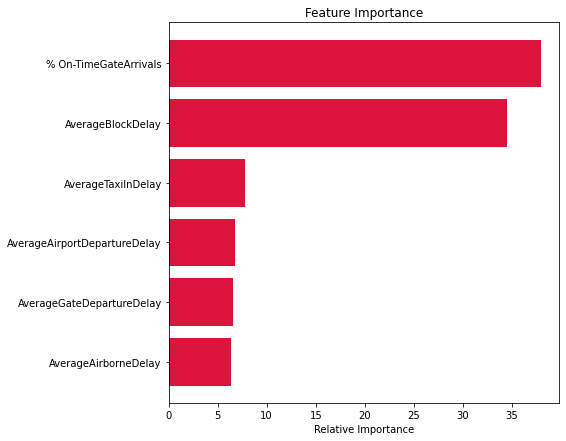

In [34]:
# Calculating the feature importance
feature_importance = rf_clf.feature_importances_
feature_importance = 100.0 * (feature_importance / np.sum(feature_importance))

# Displaying the relative feature importance by a horizontal bar chart
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
plt.figure(figsize=(7, 7))

plt.title("Feature Importance")
plt.xlabel('Relative Importance')
plt.barh(pos, feature_importance[sorted_idx], color='crimson', align="center")
# Update x-axis labels with actual feature names
feature_names = ['% On-TimeGateArrivals', 'AverageBlockDelay', 'AverageTaxiInDelay',
                 'AverageAirborneDelay', 'AverageAirportDepartureDelay', 'AverageGateDepartureDelay']
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.show()


We can see that the AverageBlockDelay and % On-TimeGateArrivals are the most significant features .

c) Construct a logistic regression classifier for the classification problem. Calculate various
relevant accuracy metrics, and assess the performance of your constructed classifier.
What is the AUC of the corresponding ROC curve for this binary classifier? Plot
decision regions in the feature space.

In [35]:
X=gad_df[[ '% On-TimeGateArrivals', 'AverageBlockDelay']].values
y=gad_df[['Delay_Class']]
y=np.ravel(y)
         
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [36]:
from sklearn.linear_model import LogisticRegression   # Importing Logistic Regression from sklearn

logreg = LogisticRegression(penalty = 'l2', max_iter = 10000) # Instantiating logistic regression 

logreg.fit(X_train, y_train)  # Fitting the train data to 'logreg'

LogisticRegression(max_iter=10000)

In [37]:
# Predicted class for the test subset through logistic regression 

y_train_pred_prob = logreg.predict_proba(X_train)  # Calculating probabilities of the two classes in train subset
y_test_pred_prob = logreg.predict_proba(X_test)    # Calculating probabilities of the two classes in test subset
y_train_pred = y_train_pred_prob.argmax(axis=1)  # Finding the predicted class for train predictions
y_test_pred = y_test_pred_prob.argmax(axis=1)  # Finding the predicted class for test predictions

In [38]:
# Calculating the train and test accuracy scores of the model

from sklearn import metrics    # Importing 'metrics' from sklearn

train_score = metrics.accuracy_score(y_train, y_train_pred) # train accuracy

test_score = metrics.accuracy_score(y_test, y_test_pred)    # test accuracy

print('Train accuracy score of the model is ', round(train_score, 5),'\n')
print('Test accuracy score of the model is ', round(test_score, 5))

Train accuracy score of the model is  0.93776 

Test accuracy score of the model is  0.94022


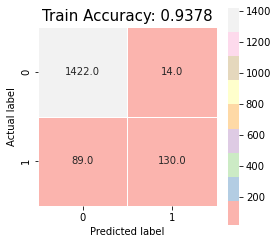

Classification Report for the Train Subset: 

               precision    recall  f1-score   support

           0       0.94      0.99      0.97      1436
           1       0.90      0.59      0.72       219

    accuracy                           0.94      1655
   macro avg       0.92      0.79      0.84      1655
weighted avg       0.94      0.94      0.93      1655



In [39]:
# Computing the confusion matrix for the train subset

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
train_c_matrix = confusion_matrix(y_train, y_train_pred)  # Compute the train confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(train_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Train Accuracy: {0}'.format(round(train_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Print the train classification report

print('Classification Report for the Train Subset: \n\n', classification_report(y_train, y_train_pred))

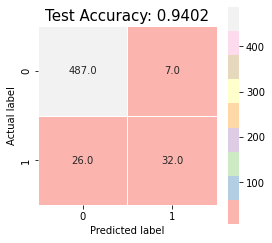

Classification Report for the Test Subset: 

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       494
           1       0.82      0.55      0.66        58

    accuracy                           0.94       552
   macro avg       0.88      0.77      0.81       552
weighted avg       0.94      0.94      0.93       552



In [40]:
# Computing the confusion matrix for the test subset

test_c_matrix = confusion_matrix(y_test, y_test_pred)  # Compute the test confusion matrix

plt.figure(figsize=(4,4))
sns.heatmap(test_c_matrix, annot=True, fmt=".1f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Test Accuracy: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

# Print the train classification report

print('Classification Report for the Test Subset: \n\n', classification_report(y_test, y_test_pred))

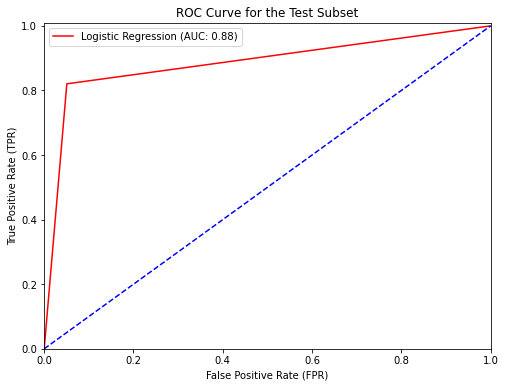

In [41]:
# Plotting the ROC curve for the test subset

from sklearn.metrics import roc_curve, auc   # Importing 'roc_curve' and 'auc' from sklearn

fpr, tpr, thresholds = roc_curve(y_test_pred, y_test)  # Computing ROC for the test subset
auc(fpr, tpr)                                          # Computing AUC for the test subset 

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label='Logistic Regression (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

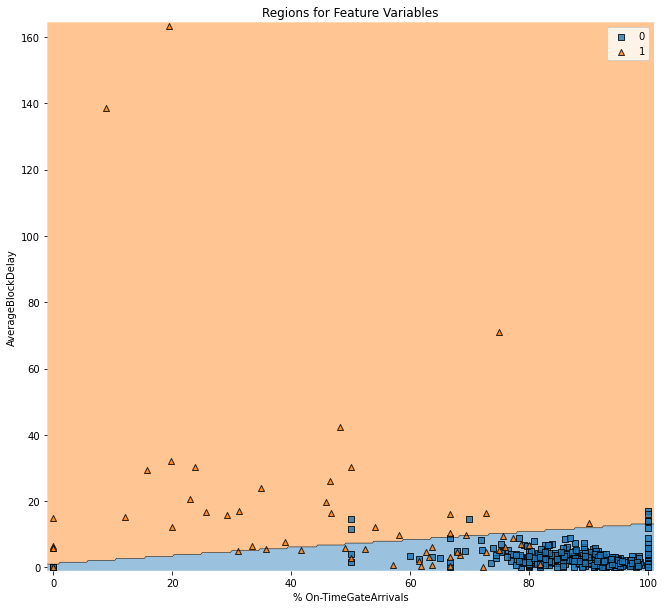

In [42]:
# Plotting the decision regions
import mlxtend
from mlxtend.plotting import plot_decision_regions

mlxtend.plotting.plot_decision_regions(X=X_test, y=y_test, clf=logreg) # Plotting the decision region

plt.title('Regions for Feature Variables')
plt.xlabel('% On-TimeGateArrivals')
plt.ylabel('AverageBlockDelay') 
plt.legend(loc='upper right')
plt.tight_layout()
plt.gcf().set_size_inches(10, 10)
plt.show()

## 0: 
## 1: 

Here after training using logistic regression we can observe that the model shows 94 precent of accuracy and recall value is also 97 percent, but it shows 88 percent of area under curve (i.e AUC). As this is a unbalanced data set it is good to consider area under curve as appropriate metric for model evaluation. Here AUC is 88 precent. The model shows some false positive rate.This the reason why recall value is low. 

--------------------------------------------------(d)----------------------------------------------------------------------

(d) Construct a support vector classifier to perform the classification task. Now use a couple of different kernels to construct support vector machines for the classification task at
hand. In each case, calculate the accuracy metrics and present your assessment of each
classifier. Define a range for the relevant hyperparameters and employ GridSearchCV to
find the optimal choice of hyperparameters in the specified range. Rerun the classifiers
with the optimal choices of hyperparameters and compare the performance of your classifier with the case where hyperparameters were not tuned. Plot the decision regions in
the feature space.


In [43]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn import svm
def svm_clf(X_tr, X_ts, y_tr, y_ts, ker, C, gamma='auto', r=0, deg=1):
    clf = svm.SVC(kernel=ker, gamma=gamma, C=C, coef0=r, degree=deg)
    clf.fit(X_tr, y_tr)              # Fit the train data
    y_tr_pred = clf.predict(X_tr)    # Predict the target for train data
    y_ts_pred = clf.predict(X_ts)    # Predict the target for test data
    tr_score = metrics.accuracy_score(y_tr, y_tr_pred)  # Compute train accuracy
    ts_score = metrics.accuracy_score(y_ts, y_ts_pred)  # Compute test accuracy
    tr_report = classification_report(y_tr, y_tr_pred)  # Generate classification report for train data
    ts_report = classification_report(y_ts, y_ts_pred)  # Generate classification report for test data
    print('Train Classification Report: \n\n', tr_report,'\n\n')
    print('Test Classification Report: \n\n', ts_report)
    return 

In [44]:
# Apply linear SVM with very low budget for margin violation

svm_clf(X_train, X_test, y_train, y_test, ker='linear', C=0.01)

Train Classification Report: 

               precision    recall  f1-score   support

           0       0.93      0.99      0.96      1436
           1       0.89      0.53      0.66       219

    accuracy                           0.93      1655
   macro avg       0.91      0.76      0.81      1655
weighted avg       0.93      0.93      0.92      1655
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       0.95      0.98      0.96       494
           1       0.79      0.52      0.62        58

    accuracy                           0.93       552
   macro avg       0.87      0.75      0.79       552
weighted avg       0.93      0.93      0.93       552



In [45]:
# Apply polynomial SVM (deg=2, r=1) with very low budget for margin violation

svm_clf(X_train, X_test, y_train, y_test, ker='poly', C=0.01, r=1, deg=2)

Train Classification Report: 

               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1436
           1       0.90      0.73      0.81       219

    accuracy                           0.95      1655
   macro avg       0.93      0.86      0.89      1655
weighted avg       0.95      0.95      0.95      1655
 


Test Classification Report: 

               precision    recall  f1-score   support

           0       0.96      0.99      0.97       494
           1       0.85      0.67      0.75        58

    accuracy                           0.95       552
   macro avg       0.91      0.83      0.86       552
weighted avg       0.95      0.95      0.95       552



After using the linear and poly kernals, we can observe that the poly kernal shows better performance for the given data set as curve is possible in polynomial function.Linear kernal shows an accuracy if 93 percent for both train and test, but the poly kernal shows 95 percent. The precision of target value 1 in linear kernal is 79 percent, but for poly kernal it is about 85 percent.

In [46]:
# Importing 'GridSearchCV' from 'sklearn'

from sklearn.model_selection import GridSearchCV

# Specifying the hyperparameters 'C', 'gamma', and 'kernel'

param_grid = {'C': [0.01, 0.1, 1, 10, 100],   
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf']}

# Instantiating 'GridSearchCV'
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, n_jobs=-1) 

# Fitting the data
grid.fit(X_train, y_train)

print('\n Best choices for hyperparameters:\n', grid.best_params_) # Presenting best choice

grid_predictions = grid.predict(X_test)  # Compute the predictions of SVM with best choice of hyperparameters

print('\n Test Classification Report:\n\n', classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 20 candidates, totalling 100 fits

 Best choices for hyperparameters:
 {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}

 Test Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       494
           1       0.83      0.59      0.69        58

    accuracy                           0.94       552
   macro avg       0.89      0.79      0.83       552
weighted avg       0.94      0.94      0.94       552



In [49]:
# Importing 'GridSearchCV' from 'sklearn'

from sklearn.model_selection import GridSearchCV

# Specifying the hyperparameters 'C', 'gamma', and 'kernel'

param_grid = {'C': [0.01, 0.1, 1, 10, 100],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'gamma':['scale', 'auto'],
              'kernel': ['linear', 'rbf'],
              'degree': [2, 3],
              'coef0': [0, 1, 2]}

grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3, n_jobs=-1) 

grid.fit(X_train, y_train)

print('\n Best choices for hyperparameters:\n', grid.best_params_) 

grid_predictions = grid.predict(X_test) 

print('\n Test Classification Report:\n\n', classification_report(y_test, grid_predictions)) 

Fitting 5 folds for each of 120 candidates, totalling 600 fits

 Best choices for hyperparameters:
 {'C': 100, 'coef0': 0, 'degree': 2, 'gamma': 'scale', 'kernel': 'rbf'}

 Test Classification Report:

               precision    recall  f1-score   support

           0       0.95      0.99      0.97       494
           1       0.83      0.59      0.69        58

    accuracy                           0.94       552
   macro avg       0.89      0.79      0.83       552
weighted avg       0.94      0.94      0.94       552



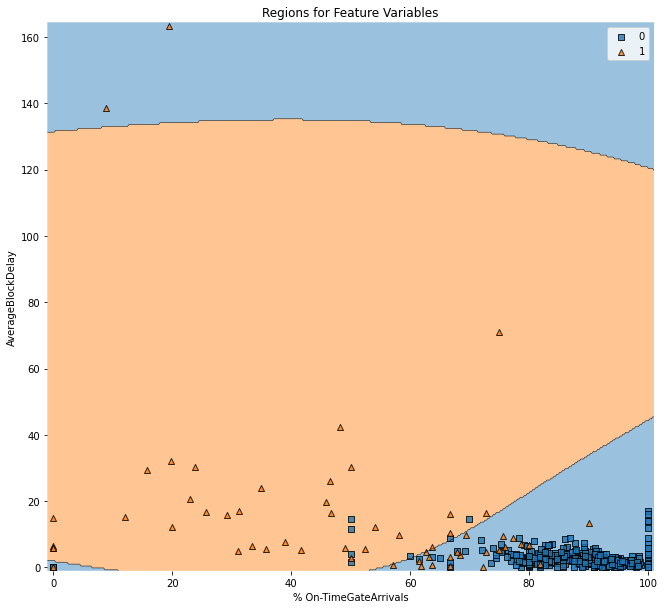

In [50]:
# Plotting the decision regions
import mlxtend
from mlxtend.plotting import plot_decision_regions

mlxtend.plotting.plot_decision_regions(X=X_test, y=y_test, clf=grid) # Plotting the decision region

plt.title('Regions for Feature Variables')
plt.xlabel('% On-TimeGateArrivals')
plt.ylabel('AverageBlockDelay') 
plt.legend(loc='upper right')
plt.tight_layout()
plt.gcf().set_size_inches(10, 10)
plt.show()

## 0: 
## 1: 

In [ ]:
y_tr_pred = grid.predict(X_train)    # Predict the target for train data
y_ts_pred = grid.predict(X_test)    # Predict the target for test data
tr_score = metrics.accuracy_score(y_train, y_tr_pred)  # Compute train accuracy
ts_score = metrics.accuracy_score(y_test, y_ts_pred)  # Compute test accuracy
tr_report = classification_report(y_train, y_tr_pred)  # Generate classification report for train data
ts_report = classification_report(y_test, y_ts_pred)  # Generate classification report for test data
print('Train Classification Report: \n\n', tr_report,'\n\n')
print('Test Classification Report: \n\n', ts_report)

(e) Construct a Gaussian naive Bayes classifier for the classification task at hand. Calculate the relevant accuracy metrics and plot the decision regions in the feature space.
Investigate whether (and to what extent) the underlying assumptions of the naive Bayes
algorithm are fulfilled. Explain the validity of the assumptions in this case, and explain
whether you trust the results obtained from this classifier.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Loading the dataset

gad_df = pd.read_csv('GateArrivalDelay-Classification.csv')     # Reading the csv source file as a dataframe
gad_df = gad_df.drop('Unnamed: 0', axis=1)       # Removing the un named column
gad_df.head()
X=gad_df[[ '% On-TimeGateArrivals', 'AverageBlockDelay']].values
y=gad_df[['Delay_Class']]
y=np.ravel(y)
         
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [ ]:
# Importing 'GaussianNB' from naive_bayes module

from sklearn.naive_bayes import GaussianNB

gnb_clf = GaussianNB()              # Instantiating the gaussian naive Bayes classifier
gnb_clf.fit(X_train, y_train)       # Fitting the training data

In [ ]:
# Finding the predictions of the model for the train and test subsets

train_y_pred = gnb_clf.predict(X_train)
test_y_pred = gnb_clf.predict(X_test)

In [ ]:
# Computing various classification evaluation metrics and presenting the classification report

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Gaussian NB Train Classification Report: \n\n', train_report,'\n\n')
print('Gaussian NB Test Classification Report: \n\n', test_report)

In [ ]:
# Computing the confusion matrix

gnb_c_matrix = confusion_matrix(y_test, test_y_pred)
import seaborn as sns
plt.figure(figsize=(4,4))
sns.heatmap(gnb_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
# Plotting the ROC curve for the test subset

from sklearn.metrics import roc_curve, auc   # Importing 'roc_curve' and 'auc' from sklearn

fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)  # Computing ROC for the test subset
auc(fpr, tpr)                                          # Computing AUC for the test subset 

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='Gaussian Naive Bayes (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the dataset
gad_df = pd.read_csv('GateArrivalDelay-Classification.csv')     # Reading the csv source file as a dataframe
gad_df = gad_df.drop('Unnamed: 0', axis=1)       # Removing the unnamed column

# Checking the distribution of each feature in each class (+1 and -1 classes)
classes = gad_df['Delay_Class'].unique()   # Get unique class labels
features = ['% On-TimeGateArrivals', 'AverageBlockDelay']   # List of features to plot histograms for

fig, axs = plt.subplots(len(classes), len(features), figsize=(16, 7), tight_layout=True)

for i, c in enumerate(classes):
    for j, feature in enumerate(features):
        x_arr = gad_df[gad_df['Delay_Class'] == c][feature].values
        axs[i, j].hist(x_arr, bins=40)
        axs[i, j].set_title(f'{feature} Distribution for Class {c}')
        
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import pearsonr



# Extract the two features for which you want to check correlation
feature1 = gad_df['% On-TimeGateArrivals']
feature2 = gad_df['AverageBlockDelay']

# Check Pearson's correlation coefficient
correlation, p_value = pearsonr(feature1, feature2)
print('Pearson\'s correlation coefficient:', correlation)
print('P-value:', p_value)
print('No significant correlation')


Here we can see the pearson's correlation coefficient is -0.3 which is very small hence the features are independent of eachother.Also by oberving the histograms we can see the features are normally distributed. Hence we can assume that the results we got by apply the gaussian naive bias are true.

In [ ]:
# Plotting the decision regions
import mlxtend
from mlxtend.plotting import plot_decision_regions

mlxtend.plotting.plot_decision_regions(X=X_test, y=y_test, clf=gnb_clf) # Plotting the decision region

plt.title('Regions for Feature Variables')
plt.xlabel('% On-TimeGateArrivals')
plt.ylabel('AverageBlockDelay') 
plt.legend(loc='upper right')
plt.tight_layout()
plt.gcf().set_size_inches(10, 10)
plt.show()

## 0: 
## 1: 

-----------------------------------------------(f)------------------------------------------------------

(f) Construct an LDA classifier and carefully assess its performance. Plot the decision
regions in the feature space.

In [ ]:
# Loading 'LinearDiscriminantAnalysis' from 'discriminant_analysis' module

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()     # Instantiating the lda classifier
lda_clf.fit(X_train, y_train)              # Fitting the train data

In [ ]:
# Finding the predictions of the lda classifier for train and test subsets 

train_y_pred = lda_clf.predict(X_train)
test_y_pred = lda_clf.predict(X_test)

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('LDA Train Classification Report: \n\n', train_report,'\n\n')
print('LDA Test Classification Report: \n\n', test_report)

we can observe that, by applying lda the accuracy of test dataset is 90 percent and the accuracy of train dataset is 89 percent. This shows a slight better performance than the previous gaussian naive bias classifier. The varience is reduced on camparing with gaussian naive bias classifier.

In [ ]:
# Computing lda confusion matrix

lda_c_matrix = confusion_matrix(y_test, test_y_pred)

plt.figure(figsize=(4,4))
sns.heatmap(lda_c_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Pastel1');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(test_score, 4))
plt.title(all_sample_title, size = 15);
plt.show()

In [ ]:
# Plotting the ROC curve for the test subset

from sklearn.metrics import roc_curve, auc   # Importing 'roc_curve' and 'auc' from sklearn

fpr, tpr, thresholds = roc_curve(test_y_pred, y_test)  # Computing ROC for the test subset
auc(fpr, tpr)                                          # Computing AUC for the test subset 

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='red', label='LDA (AUC: %.2f)'
% auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.title('ROC Curve for the Test Subset')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()

In [ ]:
# Plotting the decision regions
import mlxtend
from mlxtend.plotting import plot_decision_regions

mlxtend.plotting.plot_decision_regions(X=X_test, y=y_test, clf=lda_clf) # Plotting the decision region

plt.title('Regions for Feature Variables')
plt.xlabel('% On-TimeGateArrivals')
plt.ylabel('AverageBlockDelay') 
plt.legend(loc='upper right')
plt.tight_layout()
plt.gcf().set_size_inches(10, 10)
plt.show()

## 0: 
## 1: 

(g) Construct a decision tree classifier for the classification task at hand. Initially do NOT tune any of the hyperparameters of the tree. Does your tree suffer from overfitting? Use GridSearchCV and tune some of the hyperparameters of your tree to cure the high variance. Calculate the relevant accuracy metrics after tuning the hyperparameters of your tree. How successful were you in curing the high variance?

In [ ]:
from sklearn import tree                # Importing 'tree' module from sklearn

# Constructing tree classifier with no specified hyperparameters

dt_clf = tree.DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

In [ ]:
# Finding the predictions of tree classifier for train and test subsets

train_y_pred = dt_clf.predict(X_train)
test_y_pred = dt_clf.predict(X_test)

In [ ]:
# Computing various classification evaluation metrics and presenting the classification report

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Decision Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Decision Tree Test Classification Report: \n\n', test_report)

Here by oberving the accuracy of train and test report we can see that the tree is suffering from high varience .

In [ ]:
# Using GridSearchCV to figure out the best values of the tree hyperparameters

from sklearn.model_selection import GridSearchCV

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=3), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)

In [ ]:
# Displaying the best hyperparameters from 'params'

grid_search_cv.best_estimator_

In [ ]:
# Retraining the tree classifier (this time with best hyperparameters found above)

tr_clf = tree.DecisionTreeClassifier(max_leaf_nodes=6,random_state=3)
tr_clf.fit(X_train, y_train)

In [ ]:
# Finding the predictions of tree classifier for train and test subsets

train_y_pred = tr_clf.predict(X_train)
test_y_pred = tr_clf.predict(X_test)

In [ ]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Decision Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Decision Tree Test Classification Report: \n\n', test_report)

Here after using the grid search to get the best hyperparameters we can see the model has no varience, as the accuracy of the train and test is about 95 percent.

We decrease the varience on the cost of bias as accuracy of the model reduced from 99 percent to 96 percent, there by acheiving the bias-varience trade mark.

(h) In this part, you will apply some of the ensemble learning methods discussed in class.
Proceed as follows:

i. Construct a random forest classifier (with the same two features), and try to tune
the hyperparameters of the forest so that you’ll find a more accurate model than
the tree classifier constructed in part (g)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Loading the dataset

gad_df = pd.read_csv('GateArrivalDelay-Classification.csv')     # Reading the csv source file as a dataframe
gad_df = gad_df.drop('Unnamed: 0', axis=1)       # Removing the un named column
gad_df.head()
X=gad_df[[ '% On-TimeGateArrivals', 'AverageBlockDelay']].values
y=gad_df[['Delay_Class']]
y=np.ravel(y)
         
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter search space
params = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 3, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=3)

# Perform grid search cross-validation to get the best suitable hyperparameters
grid_search_cv = GridSearchCV(rf_clf, params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)


In [ ]:
# Displaying the best hyperparameters from 'params'

grid_search_cv.best_estimator_
# Retraining the tree classifier (this time with best hyperparameters found above)

rf_clf = RandomForestClassifier(min_samples_leaf=4,random_state=3)
rf_clf.fit(X_train, y_train)
# Finding the predictions of tree classifier for train and test subsets

train_y_pred = rf_clf.predict(X_train)
test_y_pred = rf_clf.predict(X_test)

In [ ]:
# Computing various classification evaluation metrics and presenting the classification report

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Random Forest Train Classification Report: \n\n', train_report,'\n\n')
print('Random Forest Test Classification Report: \n\n', test_report)

Random forest regressor performed better than decision trees interms of accuracy, F1 score, precision and recall on both the test and train data sets

ii. Employ gradient boosting to construct a classifier for the same classification problem. Again try to come up with a more accurate classifier than those constructed earlier.

In [ ]:
# Importing 'GradientBoostingRegressor'

from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()  # Instantiating GradientBoostingRegressor
gb_reg.fit(X_train, y_train)          # Fitting the train data

In [ ]:
# Finding the predictions of gradient boosting regressor for train and test subsets

train_y_pred = gb_reg.predict(X_train)
test_y_pred = gb_reg.predict(X_test)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter search space
params = {
    'n_estimators': [10, 50, 100,1000],  # Number of boosting stages to perform
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate for boosting
    'max_depth': [None, 3,4,5,6,7,10,20],  # Maximum depth of the base estimator
    'min_samples_split': [2, 3, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Create a Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=3)

# Perform grid search cross-validation
grid_search_cv = GridSearchCV(gb_clf, params, verbose=1, cv=3)
grid_search_cv.fit(X_train, y_train)


In [ ]:
# Displaying the best hyperparameters from 'params'

grid_search_cv.best_estimator_
# Retraining the tree classifier (this time with best hyperparameters found above)

gb_clf = GradientBoostingClassifier(learning_rate=0.2, min_samples_leaf=2, n_estimators=10,random_state=3)
gb_clf.fit(X_train, y_train)

In [ ]:
# Finding the predictions of tree classifier for train and test subsets

train_y_pred = gb_clf.predict(X_train)
test_y_pred = gb_clf.predict(X_test)

In [ ]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Gradient Boosting Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Gradient Boosting Test Classification Report: \n\n', test_report)

iii. One of the prominent ensemble learning methods is stacking. Recall, that in bagging and boosting methods, the weak learners (i.e. building blocks) are all models
of the same type. However, in stacking, one can combine the results of several
different types of weak learners to fortify the predictions. For this purpose, one
trains a simple model to find best way of stacking/combining the results of different weak learners. This useful ensemble method is already built in scikit-learn.
Visit scikit-learn page https://scikit-learn.org/stable/modules/generated/
sklearn.ensemble.StackingClassifier.html to learn about the implementation
of the stacking method. Take three of your best classifiers you constructed in the
previous parts and stack them through StackingClassifier (you’ll feed your best classifiers through the estimators parameter). Employ a simple logistic regression (for
the choice of final estimator) to learn an optimal way of stacking your three best
classifiers. How does stacking improve your results?

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Replace `clf1`, `clf2`, and `clf3` with your best classifiers from previous parts
estimators = [('clf1', gb_clf), ('clf2', rf_clf), ('clf3', dt_clf)]

# Create the stacking classifier with logistic regression as the final estimator
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

# Fit the stacking classifier to the training data
stacking_clf.fit(X_train, y_train)

# Predict on the test data
y_pred = stacking_clf.predict(X_test)

# Evaluate the performance of the stacking classifier
r2_score = stacking_clf.score(X_test, y_test)  # Replace with the appropriate scoring metric for your regression problem

print("R2 score for stacking classifier: ", r2_score)

In [ ]:
# Finding the predictions of tree classifier for train and test subsets

train_y_pred = stacking_clf.predict(X_train)
test_y_pred = stacking_clf.predict(X_test)

In [ ]:
train_score = metrics.accuracy_score(y_train, train_y_pred)   # Compute train accuracy
test_score = metrics.accuracy_score(y_test, test_y_pred)      # Compute test accuracy
train_report = classification_report(y_train, train_y_pred)   # Generate classification report for train data
test_report = classification_report(y_test, test_y_pred)      # Generate classification report for test data

print('Gradient Boosting Tree Train Classification Report: \n\n', train_report,'\n\n')
print('Gradient Boosting Test Classification Report: \n\n', test_report)

After using the stacking classifer, by oberving the results we can say that it has giving mixed results of all the three decision tree, random forest and gradient boosting . It gives the better performance with respective to f1 score. 

(i) In this problem, if your focus is on the y = 1 class (i.e. delayed gate arrivals), which
classifier among all classifiers you constructed in previous parts gives you the highest
f1-score for this class?

If we focus only on y=1 class then gradient boosting classifier is the best as it is showing 84 percent f1 score.

# 6. Ensemble Methods Applied to Regression Problems: Consider the same dataset
(GateArrivalDelay.csv) in problem 4 of HW 1. Use one of the ensemble learning methods
for regression (e.g. random forest regressor, gradient boosting regressor, extreme boosting regressor) to construct a model whose accuracy (R2-score) beats the highest accuracy you could
achieve in HW 1. Make sure that the model you construct in this problem is not suffering
from a severe high variance problem.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Loading the dataset

gad_df = pd.read_csv('GateArrivalDelay.csv')     # Reading the csv source file as a dataframe
gad_df.head()


,Date_Time,% On-TimeGateArrivals,AverageBlockDelay,AverageTaxiInDelay,AverageAirborneDelay,AverageAirportDepartureDelay,AverageGateDepartureDelay,AverageGateArrivalDelay
0,2019-03-01 00:00:00,90.00,7.70,9.47,0.60,13.67,6.67,4.70
1,2019-03-02 00:00:00,72.73,0.91,2.55,0.00,13.17,5.33,14.73
2,2019-03-03 00:00:00,75.00,1.00,0.91,0.00,25.50,14.00,11.38
3,2019-03-04 00:00:00,83.33,1.50,1.13,3.00,26.75,17.50,7.08
4,2019-03-05 00:00:00,90.91,0.64,1.38,1.27,15.00,12.50,4.09


In [56]:
X=gad_df[[ '% On-TimeGateArrivals', 'AverageBlockDelay']].values
y=gad_df[['AverageGateArrivalDelay']]
y=np.ravel(y)
         
# Breaking the data into train and test subsets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [57]:
# Importing 'xgboost'
!pip install xgboost

In [58]:
import xgboost as xgb 

# Instantiate 'XGBRegressor'
#xgb_reg = xgb.XGBRegressor(n_estimators=700, max_depth=6, eta=0.01, subsample=0.8)  

#xgb_reg = xgb.XGBRegressor(n_estimators=700, max_depth=6, eta=0.04, subsample=0.8, reg_alpha=0.01, reg_lambda=0.1)
xgb_reg = xgb.XGBRegressor(n_estimators=700, max_depth=6, eta=0.04, subsample=0.6)



xgb_reg.fit(X_train, y_train)  # Fitting the train data

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eta=0.04, eval_metric=None,
             feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=700, n_jobs=None,
             num_parallel_tree=None, predictor=None, ...)

In [59]:
# Finding the predictions of XGBoost regressor for train and test subsets

train_y_pred = xgb_reg.predict(X_train)
test_y_pred = xgb_reg.predict(X_test)

In [60]:
r2_train_score = xgb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = xgb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.9466 

R^2 score for test dataset =  0.7263 



In [61]:
# Importing 'GradientBoostingRegressor'

from sklearn.ensemble import GradientBoostingRegressor

gb_reg = GradientBoostingRegressor()  # Instantiating GradientBoostingRegressor
gb_reg.fit(X_train, y_train)          # Fitting the train data

GradientBoostingRegressor()

In [62]:
# Finding the predictions of XGBoost regressor for train and test subsets

train_y_pred = gb_reg.predict(X_train)
test_y_pred = gb_reg.predict(X_test)

In [63]:
r2_train_score = gb_reg.score(X_train, y_train)   # Calculating R^2 score for train
r2_test_score = gb_reg.score(X_test, y_test)      # Calculating R^2 score for test

print('R^2 score for train dataset = ', round(r2_train_score, 4), '\n')
print('R^2 score for test dataset = ', round(r2_test_score, 4), '\n')

R^2 score for train dataset =  0.8919 

R^2 score for test dataset =  0.764 



In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [65]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [66]:


# Create an instance of RandomForestRegressor
rf_regressor = RandomForestRegressor(min_samples_split=2,max_depth=5,n_estimators=4500,min_samples_leaf=1,random_state=3)

rf_regressor.fit(X_train, y_train)

# Predict on the train and test datasets
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Calculate R^2 scores
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)


print("R^2 score for train dataset: {:.4f}".format(r2_train))
print("R^2 score for test dataset: {:.4f}".format(r2_test))


R^2 score for train dataset: 0.8672
R^2 score for test dataset: 0.8276


After carefully examing all the ensemble techniques I got the the above F1 scores scores. Random forest regressor shows the best result after analysing all the ensemble learning techniques

Reference 
1. course materials 
2.https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html